# Let's take a look of Seattle AirBnB Open Data using Python
Seattle AirBnB Open Data describes the listing activity of AirBnB homestays in Seattle, WA until 2016. It is consists of 3 files

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
import gmplot
%matplotlib inline

In [86]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [87]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

## Let's see the data!

In [88]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [89]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [90]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [91]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [92]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [93]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


## How do seasonal costs change?

In [94]:
date_prices = calendar.dropna()[['date', 'price']]
date_prices.price = date_prices.price.str.replace(r"[,\$]", "").astype(float)
date_prices.date = pd.to_datetime(date_prices.date)
date_prices.date = date_prices.date.dt.month
date_prices.columns = ['month', 'price']
date_prices = date_prices.groupby("month")

monthly_prices = pd.concat([date_prices.quantile(q=0.25), date_prices.quantile(q=0.5), date_prices.mean(), date_prices.quantile(q=0.75)], axis=1)
monthly_prices.columns = ["Q1", "median", "mean", "Q3"]

<AxesSubplot:xlabel='month'>

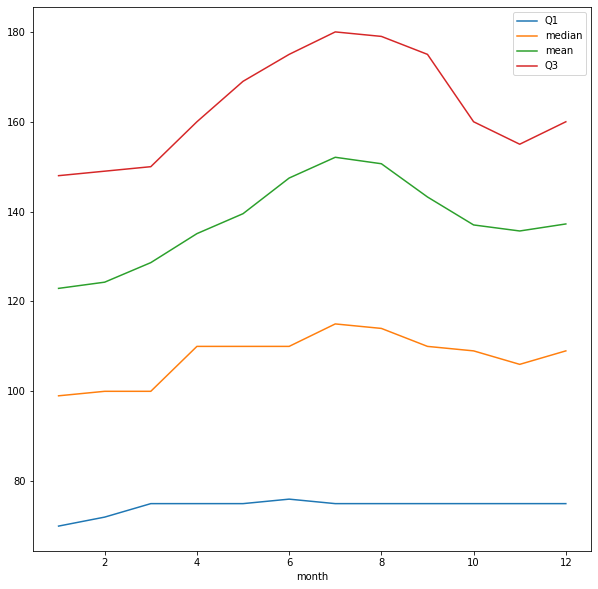

In [95]:
monthly_prices.plot.line(figsize=(10, 10))

## What is different between superhost and regular host?

In [96]:
superhosts = listings[listings.host_is_superhost == 't']
regularhosts = listings[listings.host_is_superhost == 'f']

In [97]:
drops = """
calculated_host_listings_count
license
square_feet
latitude
longitude
id	scrape_id	host_id
""".split()

In [98]:
# drop useless columns and get only numeric data
mean_compare = pd.concat(
    [
        superhosts.drop(columns=drops)._get_numeric_data().mean(), 
        regularhosts.drop(columns=drops)._get_numeric_data().mean()
    ], 
    axis=1
)
mean_compare.columns = ["superhost", "regular"]

In [99]:
pd.concat([pd.DataFrame([[len(superhosts), len(normalhosts)]], columns=mean_compare.columns), mean_compare])

,superhost,regular
0,778.000000,3038.000000
host_listings_count,4.880463,7.740948
host_total_listings_count,4.880463,7.740948
accommodates,3.338046,3.353193
bathrooms,1.255141,1.260754
bedrooms,1.257069,1.321240
beds,1.682519,1.749424
guests_included,1.829049,1.632982
minimum_nights,2.182519,2.417709
maximum_nights,655.434447,812.601382


<AxesSubplot:>

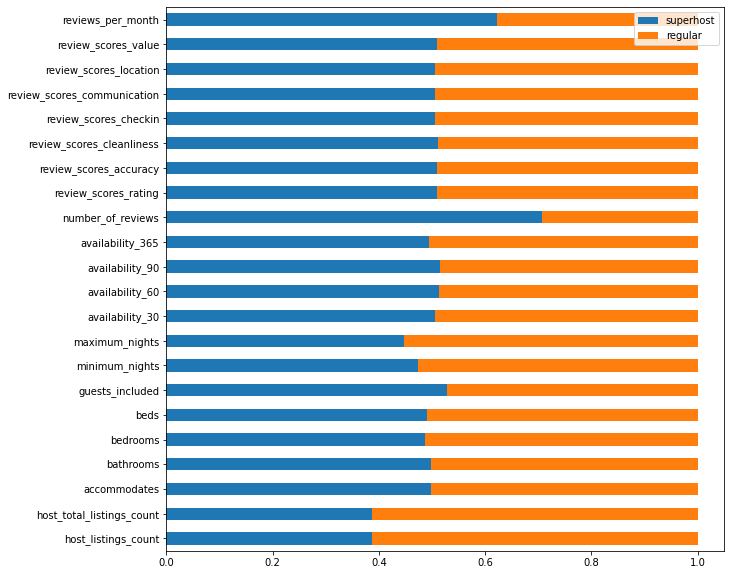

In [100]:
# (mean_compare / mean_compare.sum(axis=1))#.plot.bar()
mean_compare.div(mean_compare.sum(axis=1), axis=0).plot(kind='barh', stacked='true', figsize=(10, 10))

### Correlation Matrix Heatmap

In [101]:
listing_prices = calendar.dropna()[['listing_id', 'price']]
listing_prices.price = listing_prices.price.str.replace(r"[,\$]", "").astype(float)
listing_prices = listing_prices.groupby('listing_id').mean()['price']

listings_numeric = pd.concat([listings.id, listings._get_numeric_data().drop(columns=drops)], axis=1)
listings_numeric = listings_numeric.fillna(0)
listings_numeric = listings_numeric.merge(listing_prices, left_on='id', right_on='listing_id')

normalized_df=(listings_numeric-listings_numeric.mean())/listings_numeric.std()
normalized_df

,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,-1.787002,-0.147952,-0.147952,0.339318,-0.424557,-0.338229,-0.642091,0.263756,-0.08274,-0.247235,-0.267324,0.141919,0.344531,0.777773,4.847220,0.453990,0.544640,0.561737,0.504658,0.496522,0.279017,0.594844,1.252513,-0.521268
1,-1.547064,-0.044381,-0.044381,0.339318,-0.424557,-0.338229,-0.642091,-0.508227,-0.02215,-0.408767,-0.350483,-1.082358,-1.312533,0.327396,0.538044,0.481932,0.544640,0.561737,0.504658,0.496522,0.553102,0.594844,-0.152292,0.361113
2,-0.753950,-0.182475,-0.182475,3.900728,5.485899,4.236616,4.648590,6.439620,0.09903,-0.444011,-1.348391,-1.388428,-1.282405,-0.254001,-0.066292,0.509874,0.544640,0.561737,0.504658,0.496522,0.553102,0.594844,-0.331282,11.973568
3,0.630993,-0.216999,-0.216999,-0.169454,-0.424557,-1.481940,0.239689,-0.508227,-0.08274,0.199180,-1.431550,-1.650773,-1.794588,-0.884530,-0.591801,-2.200489,-2.175636,-2.175629,-2.185549,-2.202095,-2.187745,-2.173411,-0.955037,-0.367241
4,-1.774274,-0.182475,-0.182475,1.356864,1.264145,1.949193,1.121469,3.351688,-0.08274,0.199180,1.063220,0.972678,0.916971,0.933358,0.406666,0.370164,0.272612,0.288001,0.504658,0.496522,0.279017,0.318018,-0.472305,3.357533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,0.859960,11.969845,11.969845,1.356864,1.264145,1.949193,1.121469,-0.508227,0.03844,0.199180,0.065312,-0.251599,-0.830478,-1.793474,-0.565526,0.034862,0.000585,0.561737,-1.109466,-0.043201,0.553102,0.041193,-0.792319,2.292287
3719,1.129466,-0.216999,-0.216999,0.339318,-0.424557,-0.338229,0.239689,1.035739,-0.02215,-0.444598,-0.932596,-0.513944,-0.468937,0.179999,-0.539250,0.593699,0.544640,0.561737,0.504658,0.496522,0.553102,0.594844,0.129754,-0.365173
3720,1.589106,-0.216999,-0.216999,-0.678227,-0.424557,-0.338229,-0.642091,0.263756,-0.08274,-0.457520,0.980061,0.928954,0.856714,-1.334908,-0.591801,-2.200489,-2.175636,-2.175629,-2.185549,-2.202095,-2.187745,-2.173411,-0.955037,-0.491630
3721,1.365985,-0.216999,-0.216999,-0.678227,-0.424557,-1.481940,-0.642091,-0.508227,0.03844,0.199180,1.063220,0.972678,0.916971,-0.589737,-0.591801,-2.200489,-2.175636,-2.175629,-2.185549,-2.202095,-2.187745,-2.173411,-0.955037,-0.377510


<AxesSubplot:>

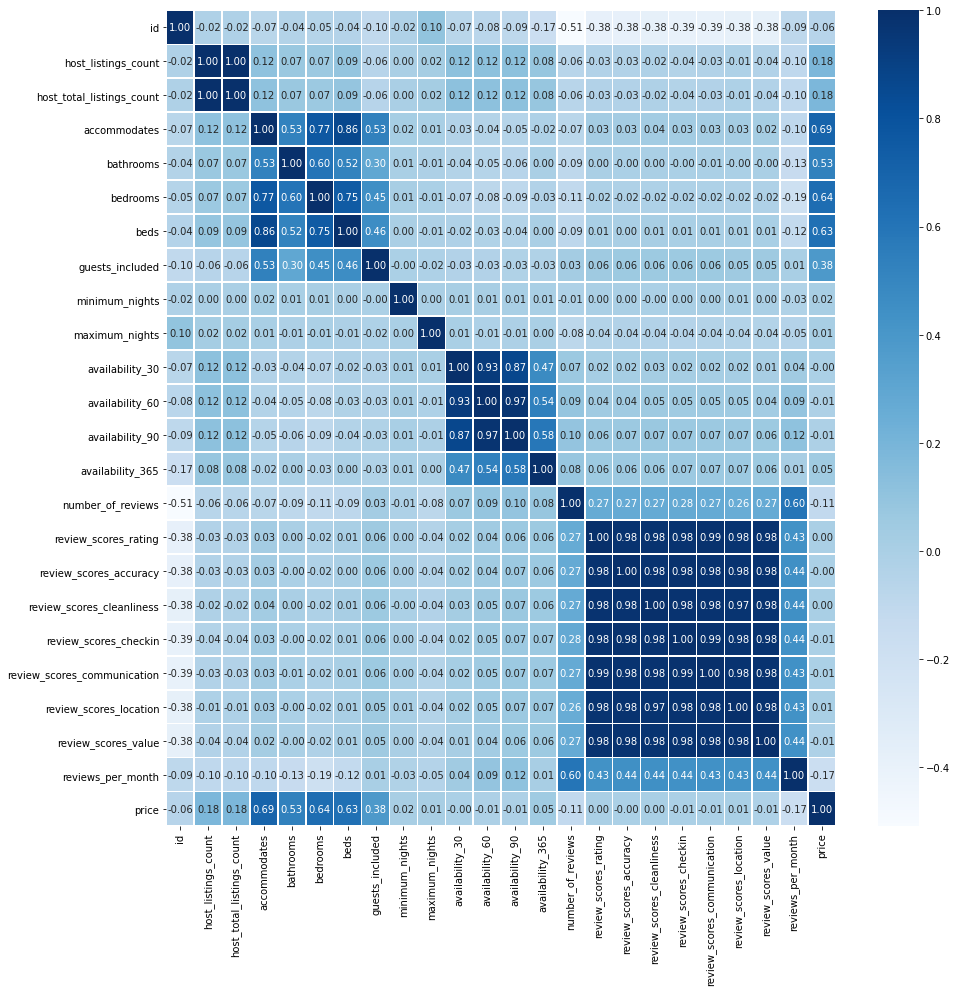

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(data = normalized_df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

## Superhost and regular host since


In [103]:
superhosts_since_year = listings[listings.host_is_superhost == 't'].host_since.str.split("-", expand=True)[0].astype(int)
regularhosts_since_year = listings[listings.host_is_superhost == 'f'].host_since.str.split("-", expand=True)[0].astype(int)

<AxesSubplot:title={'center':'Superhost Host Since'}, ylabel='Frequency'>

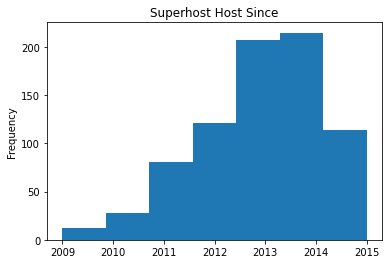

In [104]:
superhosts_since_year.plot.hist(bins=len(superhosts_since_year.value_counts()), title="Superhost Host Since")

<AxesSubplot:title={'center':'Regular Host Since'}, ylabel='Frequency'>

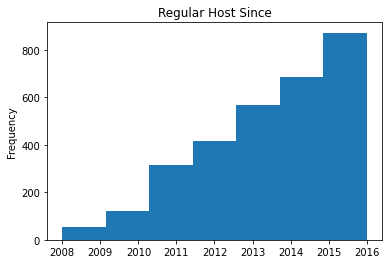

In [105]:
regularhosts_since_year.plot.hist(bins=len(superhosts_since_year.value_counts()), title="Regular Host Since")

## Superhost and regular host on the map

In [51]:
# YOUR_GMAP_API_KEY_HERE
GMAP_API_KEY = "YOUR_GMAP_API_KEY_HERE"

In [50]:
gmap = gmplot.GoogleMapPlotter(47.608013, -122.335167, 12, apikey=GMAP_API_KEY)
gmap.scatter(superhosts.latitude, superhosts.longitude, color='#FF0000', size=80, marker=False)
gmap.scatter(regularhosts.latitude, regularhosts.longitude, color='#0000FF', size=80, marker=False)
gmap.draw("map.html")

# and open 'map.html' file!

- Red: Superhost
- Blue: Regular host

![map](./img/seattle-airbnb.png)